<a href="https://colab.research.google.com/github/sallape/AI-Public/blob/main/LogisticRegression-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Intellipaat/LogisticRegression/bank-additional-full-1.csv',sep=';')

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [10]:
data.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [16]:
objdata = []
for i in data.columns:
  if data[i].dtype == 'object':
    objdata.append(i)

objdata.remove('y')

In [17]:
objdata

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in objdata:
  data[i] = le.fit_transform(data[i])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 41194
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41190 non-null  float64
 1   job             41190 non-null  int64  
 2   marital         41190 non-null  int64  
 3   education       41190 non-null  int64  
 4   default         41190 non-null  int64  
 5   housing         41190 non-null  int64  
 6   loan            41190 non-null  int64  
 7   contact         41190 non-null  int64  
 8   month           41190 non-null  int64  
 9   day_of_week     41190 non-null  int64  
 10  duration        41190 non-null  float64
 11  campaign        41190 non-null  float64
 12  pdays           41190 non-null  float64
 13  previous        41190 non-null  float64
 14  poutcome        41190 non-null  int64  
 15  emp.var.rate    41190 non-null  float64
 16  cons.price.idx  41190 non-null  float64
 17  cons.conf.idx   41190 non-null  floa

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no


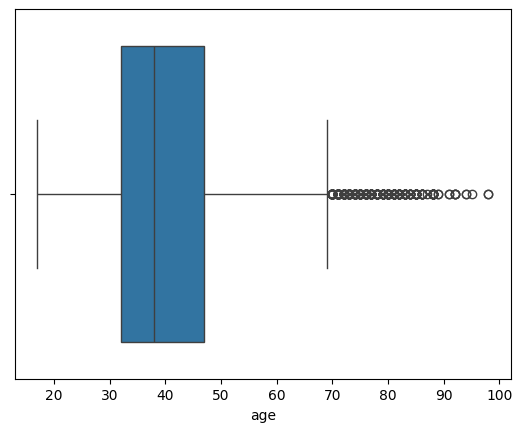

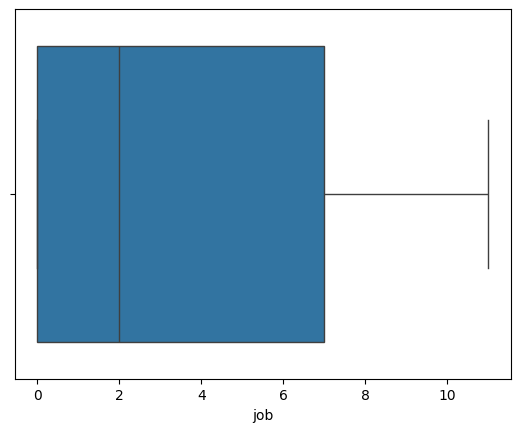

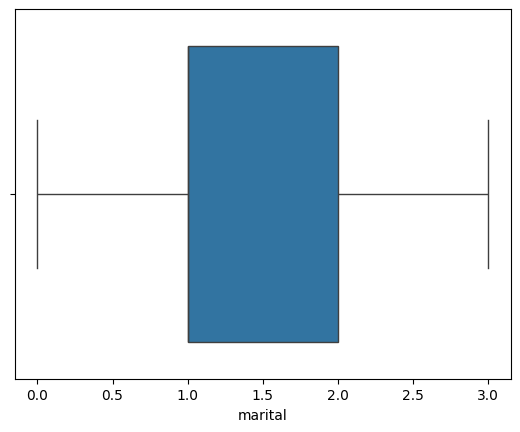

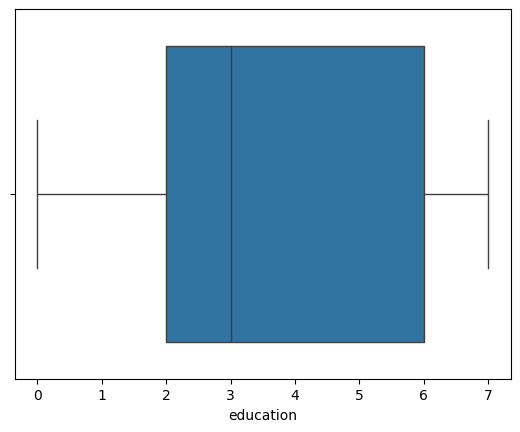

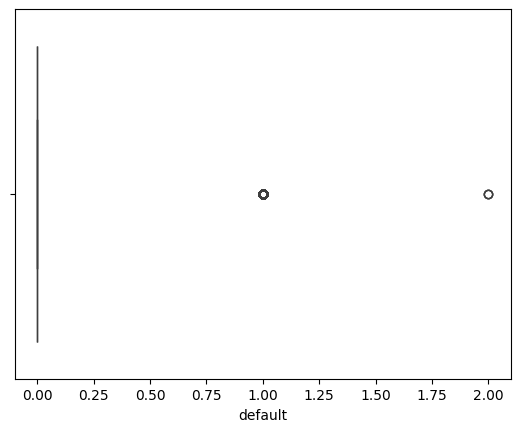

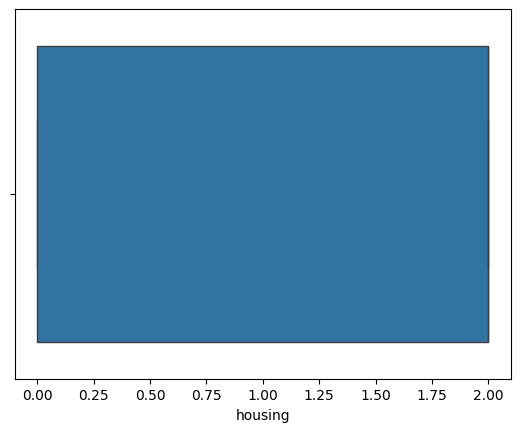

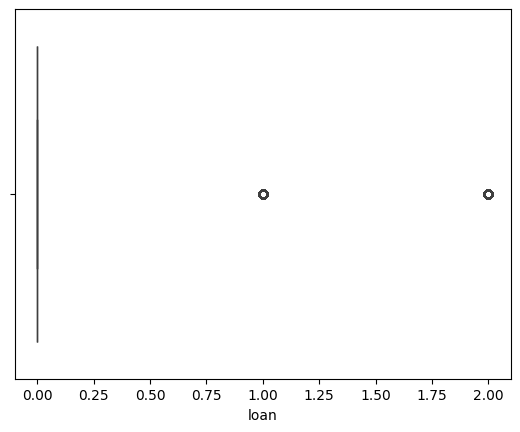

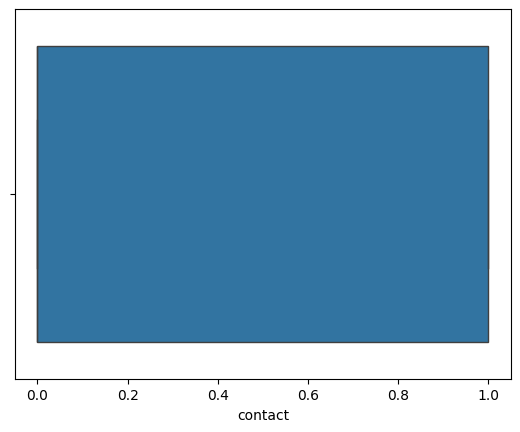

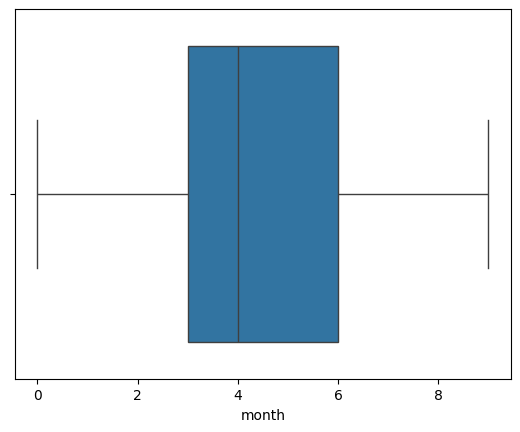

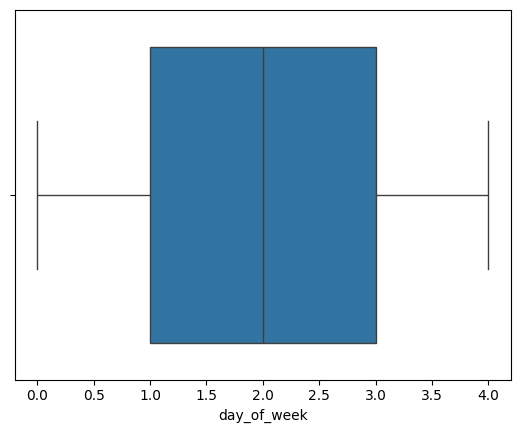

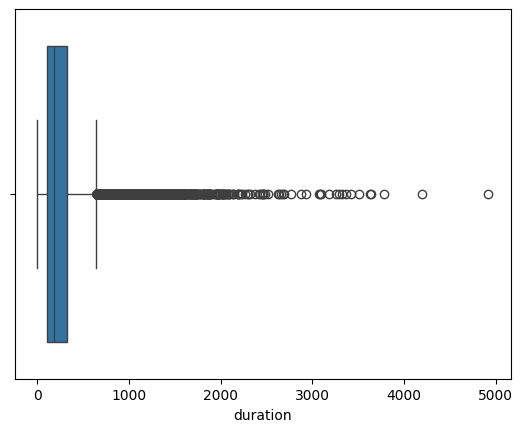

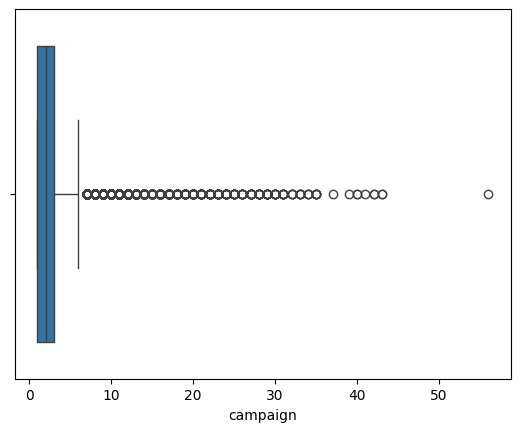

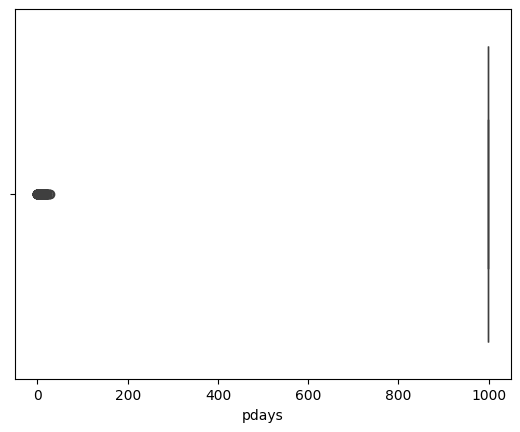

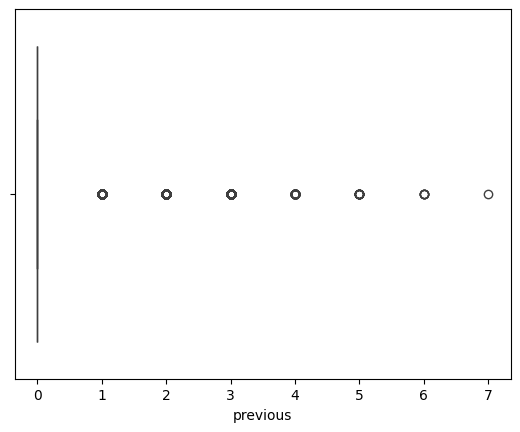

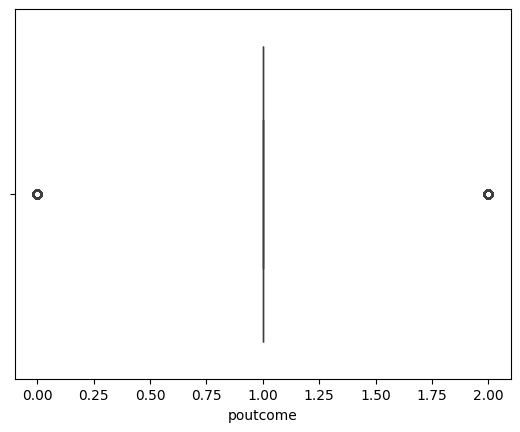

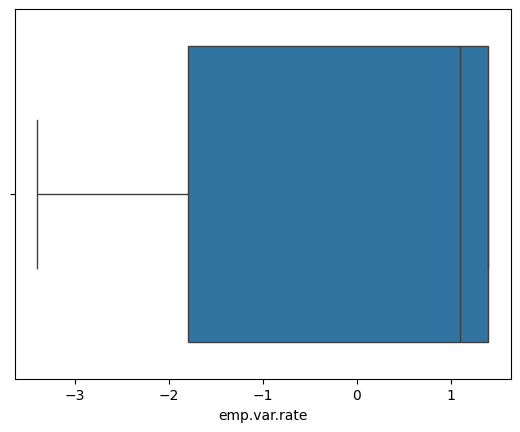

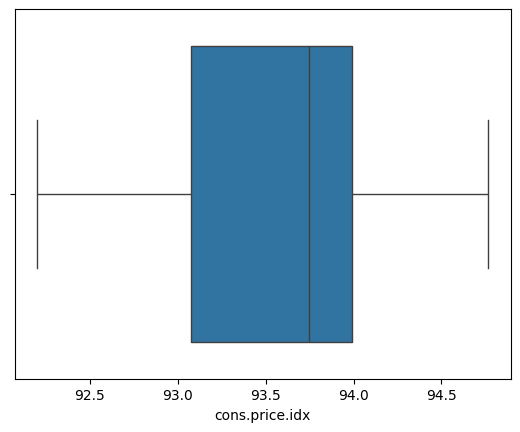

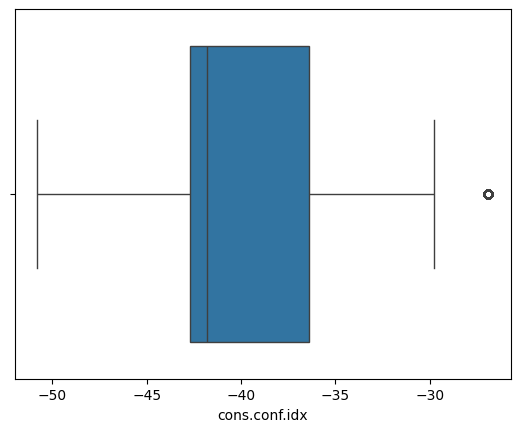

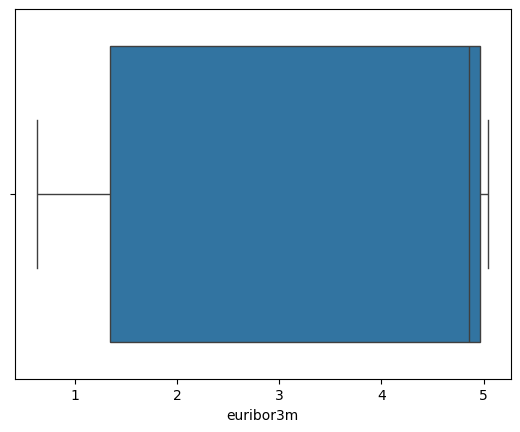

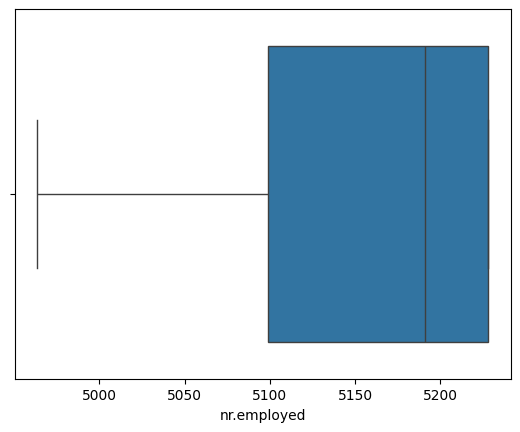

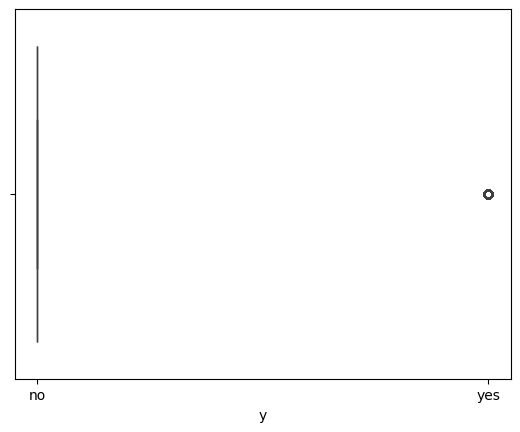

In [24]:
for i in data.columns:
  sns.boxplot(data=data,x=i)
  plt.xlabel(i)
  plt.show()

In [26]:
data.drop('pdays',axis=1,inplace=True)

In [32]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')